In [ ]:
import os

print(os.environ['CONDA_DEFAULT_ENV'])

Read log file

In [ ]:
import csv

count = 11
train = []
valid = []
with open(
        '/Users/sougata/NMBU/Semester4/MyKEPLER/tram2kepler/scripts/results/kepler_train/out_single_filtered.log') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    for line, row in enumerate(reader):
        if line % 2 != 0:
            # validation
            valid.append(row)
        else:
            # training
            train.append(row)

In [ ]:
# train

In [ ]:
# valid

In [ ]:
import pandas as pd


def to_df(_list):
    dict_list = []
    for sublist in _list:
        temp_dict = {}
        try:
            for item in sublist:
                if item:  # Ignore empty strings
                    key, value = item.split(' ', 1)
                    temp_dict[key] = value
            dict_list.append(temp_dict)
        except:
            print(item)
    return pd.DataFrame(dict_list)


In [ ]:
# Convert the list of dictionaries into a DataFrame
train_df = to_df(train).head(count)
# train_df

ppl: Stands for Perplexity. It's a measurement of how well a probability model predicts a sample and is commonly used in language modeling. A lower perplexity means the probability distribution is better at predicting the sample.  
wps: Stands for Words Per Second. It's a measure of the speed of the training process, indicating how many words are processed per second.  
ups: Stands for Updates Per Second. It's another measure of the speed of the training process, indicating how many updates (steps of the optimization algorithm) are performed per second.  
wpb: Stands for Words Per Batch. It's a measure of the batch size in terms of the total number of words. In NLP tasks, batches often contain sequences of different lengths, so it's more informative to know the total number of words rather than the number of sequences.  
bsz: Stands for Batch Size. It's the number of training examples utilized in one iteration. The batch size can significantly impact the model's performance and the speed of training.
lr: Stands for Learning Rate. It's a hyper-parameter that determines the step size at each iteration while moving toward a minimum of a loss function.  
gnorm: Stands for Gradient Norm. It's a measure of the magnitude of the model's gradients. Large gradients can cause the model to overshoot the minimum during training.  
clip: This is likely referring to Gradient Clipping. It's a technique to prevent exploding gradients in neural networks by setting a threshold value. If the gradient norm is above this threshold, it's rescaled to have the norm equal to the threshold.  
oom: Stands for Out Of Memory. It's a counter for the number of times the model ran out of memory during training.  
loss_scale: This is used in mixed precision training. It's a factor to scale the loss before computing gradients to avoid underflows caused by reduced precision.  
wall: Stands for Wall Clock Time. It's a measure of the real time that elapses from start to end, including time that passes due to programmed (artificial) delays or waiting for resources to become available.  
train_wall: This is likely the Wall Clock Time specifically for the training process. It measures the real elapsed time during the training of the model.

In [ ]:
valid_df = to_df(valid).head(count)
# valid_df

In [ ]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
def make_loss_plots(df, _type='', _ha='right', _va='bottom'):
    # Convert the columns to numeric type
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    matplotlib.rc('font', **{'size': 14})
    plt.clf()
    # Plot the 'loss' column
    plt.figure(figsize=(10, 6))
    plt.plot(df['epoch'], df['loss'], label='Total Loss', linewidth=4.0)
    plt.plot(df['epoch'], df['ke_loss'], label='KE Loss')
    plt.plot(df['epoch'], df['mlm_loss'], label='MLM Loss')

    # Find the minimum loss and its corresponding epoch
    min_loss = df['loss'].min()
    min_loss_epoch = df['epoch'][df['loss'].idxmin()]

    # Add a vertical line at the epoch of minimum loss
    plt.axvline(x=min_loss_epoch, color='gray', linestyle='--')

    # Add a horizontal line at the minimum loss
    plt.axhline(y=min_loss, color='gray', linestyle='--')

    # Print the values at the lines inside the plot
    plt.text(min_loss_epoch, min_loss, f'({min_loss_epoch}, {min_loss})', ha=_ha, va=_va, rotation=-45,
             bbox=dict(alpha=0.5))

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    title = f'{_type} Loss over epochs'
    plt.title(title)

    ax = plt.gca()
    # Hide the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    plt.savefig(f'{title}-{datetime.now().time()}.pdf', format='pdf')

    plt.show()


make_loss_plots(train_df, _type='Training', _ha='right', _va='bottom')
make_loss_plots(valid_df, _type='Validation', _ha='left', _va='top')

Plot perplexity

In [ ]:
# Plot the 'loss' column
matplotlib.rc('font', **{'size': 14})
plt.clf()
plt.figure(figsize=(10, 6))
plt.plot(train_df['epoch'], train_df['ppl'], label='Training PPL')
plt.plot(valid_df['epoch'], valid_df['ppl'], label='Validation PPL')

# Find the minimum loss and its corresponding epoch
min_ppl = valid_df['ppl'].min()
min_ppl_epoch = valid_df['epoch'][valid_df['ppl'].idxmin()]

# Add a vertical line at the epoch of minimum loss
plt.axvline(x=min_ppl_epoch, color='gray', linestyle='--')

# Add a horizontal line at the minimum loss
plt.axhline(y=min_ppl, color='gray', linestyle='--')

# Print the values at the lines inside the plot
plt.text(min_ppl_epoch + 1, min_ppl, f'({min_ppl_epoch}, {min_ppl})', ha='left', va='bottom', bbox=dict(alpha=0.5), rotation=45)

plt.xlabel('Epoch')
plt.ylabel('PPL')
plt.legend()
title = 'Perplexity over epochs'
plt.title(title)

try:
    # Find the intersection point of the 'Training Loss' and 'Validation Loss'
    diff = train_df['ppl'] - valid_df['ppl']
    intersection_index = np.where(np.diff(np.sign(diff)))[0][0] + 1
    intersection_epoch = valid_df['epoch'][intersection_index]
    intersection_loss = valid_df['ppl'][intersection_index]
 
    # Add a vertical line at the epoch of intersection
    plt.axvline(x=intersection_epoch, color='gray', linestyle='--')
 
    # Add a horizontal line at the intersection loss
    plt.axhline(y=intersection_loss, color='gray', linestyle='--')
 
    # Print the values at the lines inside the plot
    plt.text(intersection_epoch, intersection_loss, f'({intersection_epoch}, {intersection_loss})', ha='left', va='bottom', bbox=dict(alpha=0.5), rotation=45)
except Exception:
    pass

ax = plt.gca()
# Hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_facecolor('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.savefig(f'{title}-{datetime.now().time()}.pdf', format='pdf')

plt.show()

In [22]:
def make_vs_loss_plots(df1, df2, _type='', _ha='right', _va='bottom'):
    # Convert the columns to numeric type
    for col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors='coerce')
    for col in df2.columns:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')
    plt.clf()
    matplotlib.rc('font', **{'size': 14})

    # Plot the 'loss' column
    plt.figure(figsize=(10, 6))
    plt.plot(df1['epoch'], df1['loss'], label='Training Loss')
    plt.plot(df2['epoch'], df2['loss'], label='Validation Loss')


        # Find the intersection point of the 'Training Loss' and 'Validation Loss'
    diff = df1['loss'] - df2['loss']
    where = 0
    try:
        where = np.where(np.diff(np.sign(diff)))
    except Exception as e:
        print(e)
    
    if len(where) == 0 or len(where[0]) == 0:
        intersection_index = 1
    else:
        intersection_index = where[0][0] + 1
    intersection_epoch = df2['epoch'][intersection_index]
    intersection_loss = df2['loss'][intersection_index]
    
    # Add a vertical line at the epoch of intersection
    plt.axvline(x=intersection_epoch, color='gray', linestyle='--')
    
    # Add a horizontal line at the intersection loss
    plt.axhline(y=intersection_loss, color='gray', linestyle='--')
    
    # Print the values at the lines inside the plot
    plt.text(intersection_epoch, intersection_loss, f'({intersection_epoch}, {intersection_loss})', ha=_ha, va=_va, bbox=dict(alpha=0.5), rotation=45)

 
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    title = f'{_type} Loss over epochs'
    plt.title(title)         
    # plt.xscale('log')
    
    ax= plt.gca()
    # Hide the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.set_facecolor('none')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    # plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    # plt.gca().ticklabel_format(useOffset=False)
    # plt.gca().set_xticks(np.geomspace(10, count, 5).round())      
    plt.savefig(f'{title}-{datetime.now().time()}.pdf', format='pdf')        
    plt.show()

<Figure size 640x480 with 0 Axes>

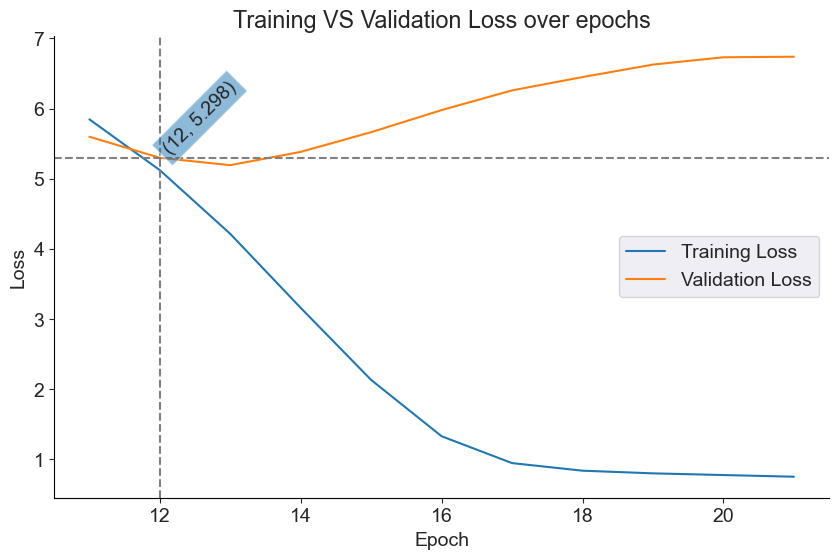

In [23]:
make_vs_loss_plots(train_df, valid_df, _type='Training VS Validation', _ha='left', _va='bottom')